## Q1: Simple numerical integral

Numerical integration methods work differently depending on whether you have the analytic function available (in which case you can evaluate it freely at any point you please) or if it is sampled for you.

Consider the function $f(x) = e^{-x^2}$.  We want to integrate this from $[-5, 5]$.  The
analytic integral is not easily obtained.  Use `integrate.quad` to do the integration.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
def f(x):
    return np.exp(-x**2)

I, err = integrate.quad(f, -5.0,5.0, epsabs=1.e-7, epsrel=1.e-7)
print(I)
print(err)


1.7724538509027912
4.6261378229003154e-14


Consider now that you have data that represents a function sampled a `N` points, but you don't know the analytic form of the function.  Here, we create the sampling here for a Gaussian and we will do the same integral

In [2]:
N = 32
x = np.linspace(-5, 5, N)
f = np.exp(-x**2)


Compute the integral of this sampled function using Simpson's method (`integrate.simps`).  Now, vary the number of sample points (try 64, 128, ...) and see how the answer changes.  Simpson's method is 4-th order accurate, which means that the error should decrease by $2^4$ when we double the number of sample points

Text(0, 0.5, '$|I_{quad}-I_{simp}(N)|$')

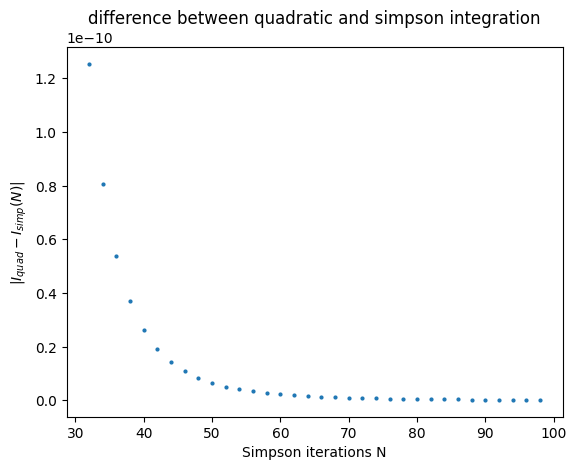

In [7]:
from scipy import integrate
import matplotlib.pyplot as plt 
import numpy as np

N = np.arange(32,100,2,dtype=np.int16)


int=[]
for i in N:

    x_sample = np.linspace(-5, 5, i)
    f = np.exp(-x_sample**2)
    int.append(integrate.simpson(f, x=x_sample) )

y=np.array(int)

fig,ax = plt.subplots()
ax.scatter(N,np.abs(y-I),s=4)
ax.set_title('Difference between quadratic and simpson integration')
ax.set_xlabel('Simpson iterations N')
ax.set_ylabel(r'$|I_{quad}-I_{simp}(N)|$') 




## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function.  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

Try some of the different interolation routines.  `interpolate.interp1d` takes a `kind` argument that let's you choose the order of the interpolation.  Measure the error in the method, by comparing the interpolated result with the actual function value.  Also, try using cubic splines (look at `CubicSpline`)

Try plotting the resulting interpolant.

linear error = 1.3866224508129523
quadratic error = 0.6367874350306516
cubic error = 0.32469472123202275
nearest error = 2.485090755165997


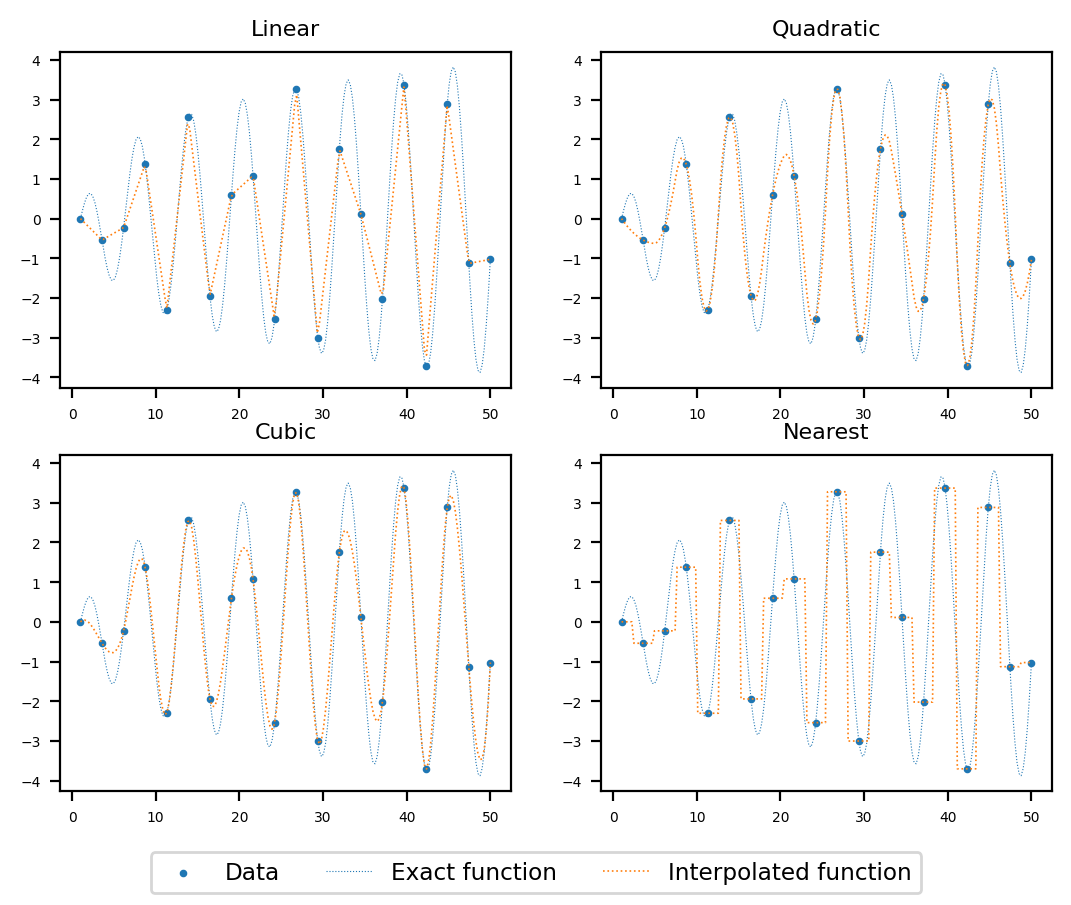

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import interpolate
import matplotlib
matplotlib.rcParams['figure.dpi']= 200
N=20
def f(x):
    return np.sin(x)*np.log(x)


x=np.linspace(1,50,N)
x_fine = np.linspace(1, 50, 10*N)

f_cub = interpolate.interp1d(x, f(x),kind='cubic')
f_quad = interpolate.interp1d(x, f(x),kind='quadratic')
f_lin = interpolate.interp1d(x, f(x))
f_nearest = interpolate.interp1d(x, f(x),kind='nearest')

mse_cub = np.mean((f_cub(x_fine) - f(x_fine))**2)
mse_quad = np.mean((f_quad(x_fine) - f(x_fine))**2)
mse_lin = np.mean((f_lin(x_fine) - f(x_fine))**2)
mse_nearest = np.mean((f_nearest(x_fine) - f(x_fine))**2)

print('linear error =',mse_lin)
print('quadratic error =',mse_quad)
print('cubic error =',mse_cub)
print('nearest error =',mse_nearest)

fig,ax = plt.subplots(2,2)
ax[0,0].tick_params(axis='both',labelsize=5)
ax[1,0].tick_params(axis='both',labelsize=5)
ax[0,1].tick_params(axis='both',labelsize=5)
ax[1,1].tick_params(axis='both',labelsize=5)

ax[0,0].set_title('Linear',fontsize=8) 
ax[0,0].scatter(x, f(x),s=3,label='Data')
ax[0,0].plot(x_fine, f(x_fine), ls=":",linewidth=0.4,label='Exact function')
ax[0,0].plot(x_fine, f_lin(x_fine), ls=":",linewidth=0.6,label='Interpolated function')

ax[0,1].set_title('Quadratic',fontsize=8) 
ax[0,1].scatter(x, f(x),s=3)
ax[0,1].plot(x_fine, f(x_fine), ls=":",linewidth=0.4)
ax[0,1].plot(x_fine, f_quad(x_fine), ls=":",linewidth=0.6)

ax[1,0].set_title('Cubic',fontsize=8) 
ax[1,0].scatter(x, f(x),s=3)
ax[1,0].plot(x_fine, f(x_fine), ls=":",linewidth=0.4)
ax[1,0].plot(x_fine, f_cub(x_fine), ls=":",linewidth=0.6)

ax[1,1].set_title('Nearest',fontsize=8) 
ax[1,1].scatter(x, f(x),s=3)
ax[1,1].plot(x_fine, f(x_fine), ls=":",linewidth=0.4)
ax[1,1].plot(x_fine, f_nearest(x_fine), ls=":",linewidth=0.6)

fig.legend(loc='lower center',
           fancybox=True, ncol=3, fontsize='small')





